In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk 

In [2]:
#加载停用词
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{"isn't", 'will', 'up', 'he', 'some', 'or', 'does', 'so', 'ma', 'me', "don't", 'yourselves', 'to', 'when', 'its', 'hers', 'such', 'hadn', 'should', 'and', "she's", 'very', "mightn't", 'we', "couldn't", 'my', 'ain', 'now', 'theirs', 'are', 'out', 'here', 'your', 'no', 'whom', 'm', 'shouldn', 'can', 'before', 'them', 'themselves', 'then', 'isn', 'was', 'down', 'our', 'the', 'what', 're', 'any', 'they', 'has', 'own', 'yours', 'how', 'am', 'of', 'do', 'you', 'were', 'be', 'her', 'once', 'll', 'nor', "should've", 'o', 'is', 'which', 'until', 'shan', 'being', 'between', 'under', 'on', "it's", "you'd", 'over', 'their', 'same', 'against', 'i', 'a', 'itself', 'don', 'had', 'aren', "didn't", 'it', "weren't", 'those', "won't", 'won', 'off', 'wasn', "wasn't", 'weren', 'myself', 'this', 'doesn', 'only', 'his', 'who', 'if', 'while', 'few', 'mustn', 'y', 'at', 'for', 'having', 'all', 'not', 't', 's', 'other', 'did', 'ours', 'doing', 'further', "you're", "you've", 'yourself', 'himself', 'both', 'where

In [3]:
#读取文档
articles = []
labels = []
 
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(articles),len(labels))
print("新闻内容：",articles[1])
print("分类标签：",labels[1])

2225 2225
新闻内容： worldcom boss  left books alone  former worldcom boss bernie ebbers  accused overseeing $11bn (拢5.8bn) fraud  never made accounting decisions  witness told jurors.  david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm shares. mr myers already pleaded guilty fraud assisting prosecutors.  monday  defence lawyer reid weingarten tried distance client allegations. cross examination  asked mr myers ever knew mr ebbers  make accounting decision  .  aware   mr myers replied.  ever know mr ebbers make accounting entry worldcom books   mr weingarten pressed.    replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan  admitted fraud testify later trial  mastermind behind worldcom accounting house cards.  mr ebbers  team  meanwhile  looking port

In [4]:
vocab_size = 5000
oov_tok = '<OOV>'
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [5]:
#将文本转为数字序列
text_sequences = tokenizer.texts_to_sequences(articles)
print(text_sequences[0])

[88, 165, 1143, 1206, 48, 1108, 727, 1, 77, 1060, 4251, 137, 173, 4112, 1331, 1297, 1584, 41, 7, 935, 88, 1, 316, 84, 19, 14, 130, 3115, 1316, 2507, 562, 406, 1263, 65, 2949, 3033, 1743, 8, 881, 740, 10, 940, 1, 9, 641, 1567, 1039, 401, 1986, 1206, 763, 48, 488, 1488, 2101, 1642, 125, 320, 114, 2731, 803, 1, 1074, 595, 10, 4398, 3833, 881, 2566, 137, 338, 173, 4112, 1, 1, 38, 66, 3204, 25, 9, 1, 18, 1384, 135, 441, 7, 128, 1385, 74, 4582, 474, 1, 88, 1039, 79, 1, 75, 2102, 56, 1, 88, 6, 1109, 602, 77, 1060, 88, 1957, 138, 149, 407, 9, 2865, 40, 139, 1207, 77, 1060, 4399, 7, 474, 1, 3116, 6, 2680, 1, 399, 1083, 1, 1362, 603, 1363, 2067, 1, 741, 9, 488, 1488, 2101, 125, 1904, 397, 882, 2068, 1608, 37, 1807, 2567, 4980, 1, 2508, 238, 9, 2622, 75, 804, 6, 1075, 1119, 139, 783, 563, 1, 126, 25, 1384, 1808, 432, 82, 941, 109, 19, 14, 18, 3383, 1, 36, 1442, 1, 22, 36, 91, 349, 2382, 36, 451, 230, 2068, 1364, 328, 1, 313, 804, 1120, 18, 2623, 1807, 1, 284, 720, 1162, 401, 2030, 387, 399, 2030,

In [6]:
#填充和截断
max_length = 200
padding_type = 'post'
trunc_type = 'post'
padded_sequences = pad_sequences(text_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(text_sequences[0]))
print(len(padded_sequences[0]))
print(len(text_sequences[1]))
print(len(padded_sequences[1]))
print(padded_sequences[1])

425
200
192
200
[1609  596  239 1628 1403  118 1609  596    1 1643  647    1    1 1987
 1810  742  281   27 2145 1264 4400   22    1  321    1   27  791 4253
  844 1865 3836    3 1643 1422 1609  370  155   47 4254  613 2248  589
 1843 3035 1188   63  285    3    1  105 2796 1163  742    1 2248  442
  844 1568 4981    1 1250 2432 3502 1767  871    1  445    3    1  360
 1461    3 1643   21 2145  187 1569    3    1 3837  360  174    3 1643
   21 2145 1866 1609 1628    3    1    1 3837 4400    3    1  748 2509
 2069 2145 4116 3385  118 1609  113  305 1585 1680 1300  844 1865  482
    1    3 1300  748  742    1  247  544    1  361 1609 2145  272  657
    3 1643  143  721  307    1    1  596    1    1    1 1423 2289    1
    3 1643    1 1609    1 4583    1 1642  607 3614    1  553 2204 1609
  370    1   93  489  889 1642 2797    1  569   63 1610 4254 1128  230
    1  264   32  749  230  391    3 1643  544   94   12   15  109  195
 1163  118    1 1144 2951 1958 2103 4781 2383    1    0    0 

In [7]:
#划分数据集
training_portion = 0.8
train_size = int(len(articles) * training_portion)
 
train_sequences = padded_sequences[0: train_size]
train_labels = labels[0: train_size]
 
validation_sequences = padded_sequences[train_size:]
validation_labels = labels[train_size:]
 
print(len(train_sequences))
print(len(train_labels))
print(len(validation_sequences))
print(len(validation_labels))

1780
1780
445
445


In [8]:
#将标签转换为数字
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
word_index = label_tokenizer.word_index
print(np.unique(labels))
print(dict(list(word_index.items())))

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(train_labels[0],training_label_seq[0])
print(train_labels[1],training_label_seq[1])
print(training_label_seq.shape)
 
print(validation_labels[0],validation_label_seq[0])
print(validation_labels[1],validation_label_seq[1])
print(validation_label_seq.shape)

['business' 'entertainment' 'politics' 'sport' 'tech']
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
tech [4]
business [2]
(1780, 1)
entertainment [5]
tech [4]
(445, 1)


In [9]:
#定义模型
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(256, 3, padding='same', strides=1, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 386,246
Trainable params: 386,246
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
num_epochs = 5
history = model.fit(train_sequences, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_sequences, validation_label_seq), 
                    verbose=2)

Epoch 1/5
56/56 - 1s - loss: 0.5877 - accuracy: 0.8264 - val_loss: 0.2859 - val_accuracy: 0.9303
Epoch 2/5
56/56 - 1s - loss: 0.2669 - accuracy: 0.9331 - val_loss: 0.1819 - val_accuracy: 0.9506
Epoch 3/5
56/56 - 1s - loss: 0.1532 - accuracy: 0.9584 - val_loss: 0.1568 - val_accuracy: 0.9506
Epoch 4/5
56/56 - 1s - loss: 0.0750 - accuracy: 0.9871 - val_loss: 0.1414 - val_accuracy: 0.9596
Epoch 5/5
56/56 - 1s - loss: 0.0519 - accuracy: 0.9899 - val_loss: 0.1538 - val_accuracy: 0.9573


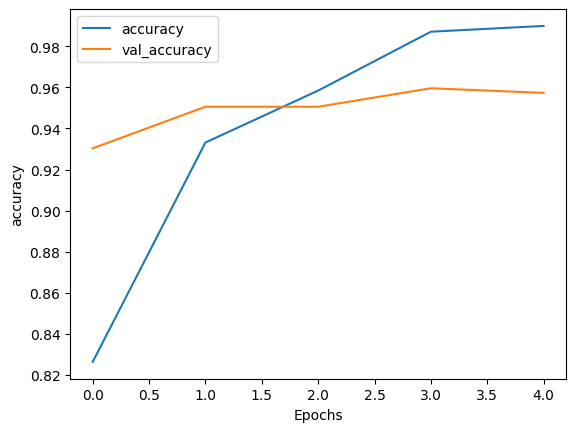

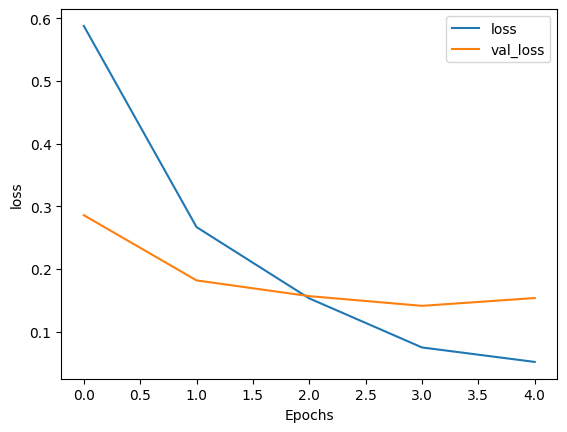

In [12]:
#训练过程可视化
from matplotlib import pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
